# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **Nama Dataset: Students Performance in Exams**

Dataset ini berisi informasi tentang performa siswa dalam tiga mata pelajaran utama : Math, Reading, Writring serta beberapa faktor sosial sepertu jenis kelamin, pendidikan orang tua, dan partisipasi dalam kursus persiapan ujian. Tujuan dari eksplorasi ini adalah untuk memahami faktor-faktor apa saja yang memengaruhi performa akadmik siswa dan mempersiapkan data untuk model presiksi kelulusan

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
#Type your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
#Type your code here

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# membaca dataset
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/StudentsPerformance.csv')

# Menampilkan 5 baris pertama
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Mengecek info dari dataset**

1.   dataset terdiri dari 1000 baris
2.   ada 8 kolom: data kategpory ada 5 dan data numerik ada 3
3.   tidak ada data yang hilang




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Deskripsi dataset**

untuk nilai rata-rata untuk ketiga skor:

Math: 66.09

Reading: 69.16

Writing: 68.05

1.   Jadi siswa cenderung lebih baik di reading dan writing dibanding math.

2.   Nilai minimum ada yang 0–17, artinya ada siswa yang nilainya sangat rendah.

3.   Sebagian besar nilai berada di rentang 60–80, menunjukkan distribusi cukup normal.

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**1.  Visualisasi Distribusi  Nilai Tiap Mata Pelajaran**

Penjelasan hasil grafik

1. ketiga distribusi mendekati normal sekitaran skor 60-80
2. Math score memiliki variasi nilai yang lebih besar dilihat dari sebarannya.
3. Reading score dan writing score memiliki puncak skitar 70-75 artinya sebagian besar siswa kuat di bagian ini
4. ada beberapa siswa dengan nilai sangat rendah dibawah 50 kemungkinan mereka belum maksimal dalam melaksanakan ujian.

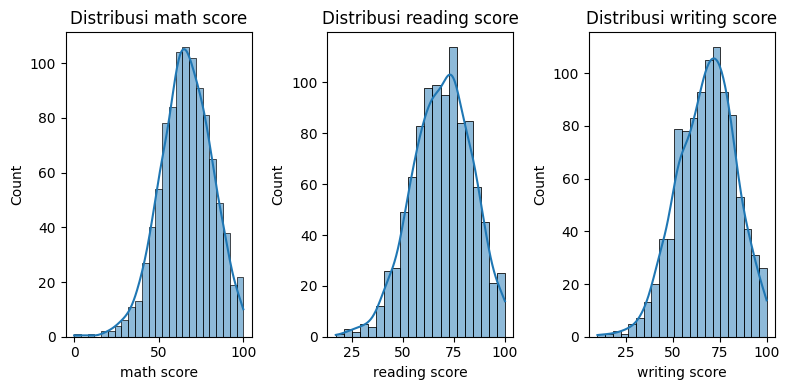

In [ ]:
#visualisasi distribusi nilai
plt.figure(figsize=(8, 4))

for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

**2. Perbandingan Nilai berdasarkan Gender**

Penjelasan hasil grafik
1. untuk Math score laki-laki memiliki rata-rata sedikit lebih tinggi dari perempuan
2. untuk Reading score dan Writing score perempuan memiliki nilai lebih tinggi dari perempuan

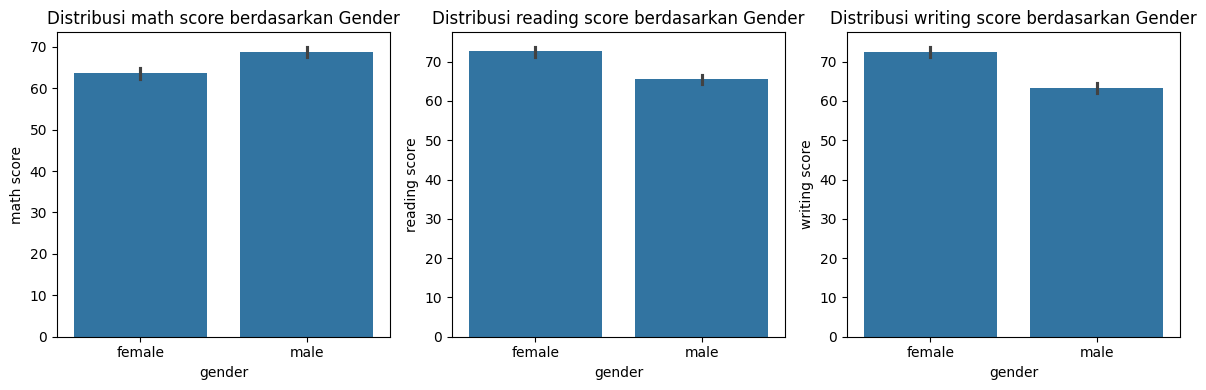

In [ ]:
plt.figure(figsize=(12, 4))

for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1,3,i+1)
    sns.barplot(x='gender', y=col, data=df)
    plt.title(f'Distribusi {col} berdasarkan Gender')

plt.tight_layout()
plt.show()

**3. Pengaruh Pendidikan Orang Tua**

Penjelasan hasil distribusi
1. dari ketiga distribusi hasilnya menunjukkan bahwa untuk ketiga skor: Math, Reading dan Writting menunjukkan bahwa ada korelasi antara pendidikan orang tua dengan skor siswa dalam mata pelajaran. siswa yang memiliki orang tua dengan pendidikan yang lebih tinggi cenderung memiliki skor yang lebih tinggi dalam ketiga mata pelajaran tersebut.

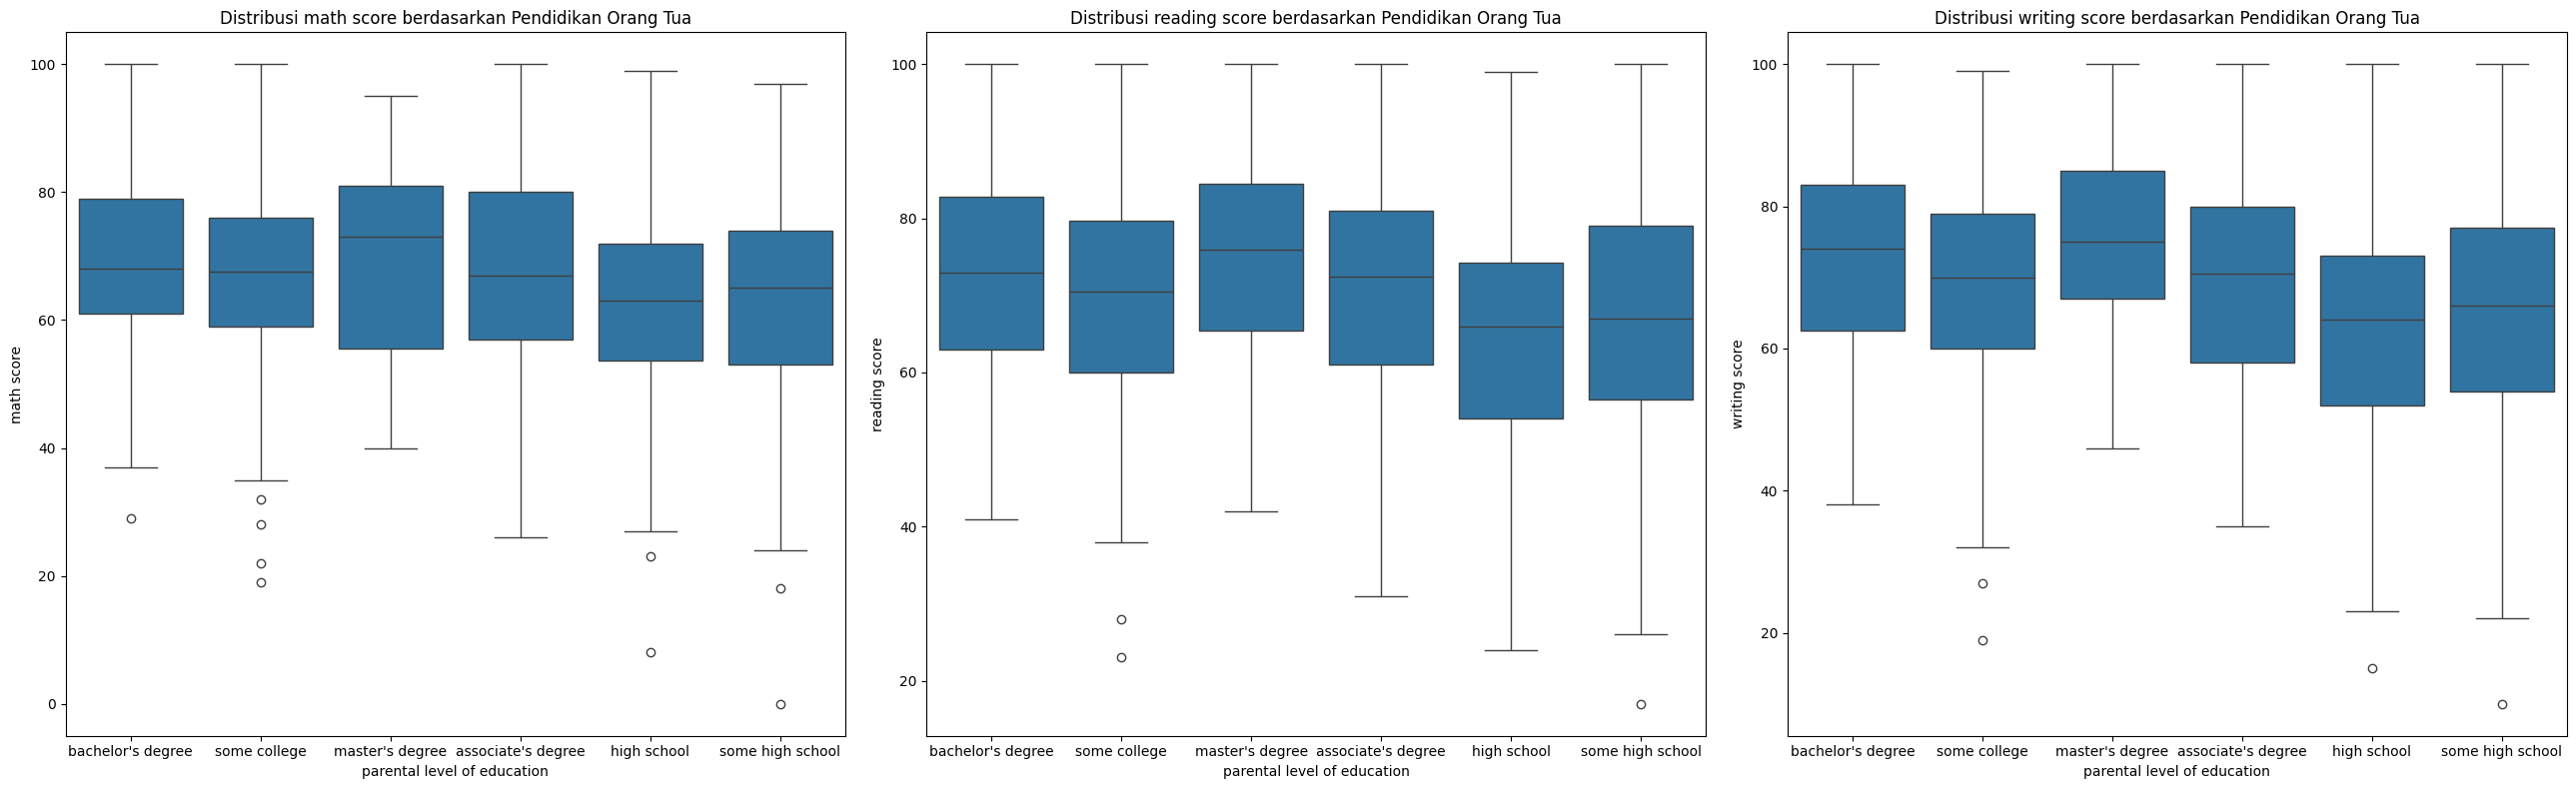

In [ ]:
plt.figure(figsize=(26, 8))

for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1,3,i+1)
    sns.boxplot(x='parental level of education', y=col, data=df)
    plt.title(f'Distribusi {col} berdasarkan Pendidikan Orang Tua')

plt.tight_layout()
plt.show()

**4. Pengaruh Kursus Persiapan Ujian**

Penjelasan hasil grafik
1. Kursus untuk persiapan ujian cukup membantu siswa dalam menghadapi ujian dimana rata-rata skor siswa untuk yang mengikuti kursus mencapa nilai 70 sedangkan untuk yang tidak kursus nilainya rata-rata berada pada skor 65

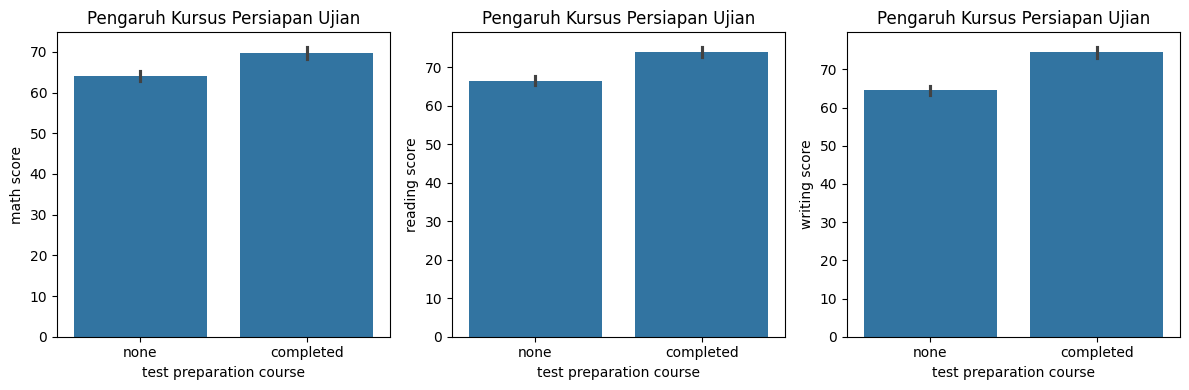

In [ ]:
# Pengaruh kursus persiapan ujian

plt.figure(figsize=(12, 4))

for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1,3,i+1)
    sns.barplot(x='test preparation course', y=col, data=df)
    plt.title(f'Pengaruh Kursus Persiapan Ujian')

plt.tight_layout()
plt.show()

5. Korelasi Antar Skor


Penjelasan hasil
1. secara keseluruhan ketiga grafik menunjukkan ada korelasi positif antara skor ketiga mata pelajaran dengan dengan skor rata-rata siswa. yang berarti bahwa kemampuan siswa dalam setiap mata pelajaran berkontribusi secara signifikan terhadap kinerja akademis mereka secara keseluruhan.
2. pada grafik juga menunjukkan bahwa writting score memiliki mungkin memiliki pengaruh yang lebih besar terhadap skor rata-rata dibandingkan dengan Math score dan Reading score

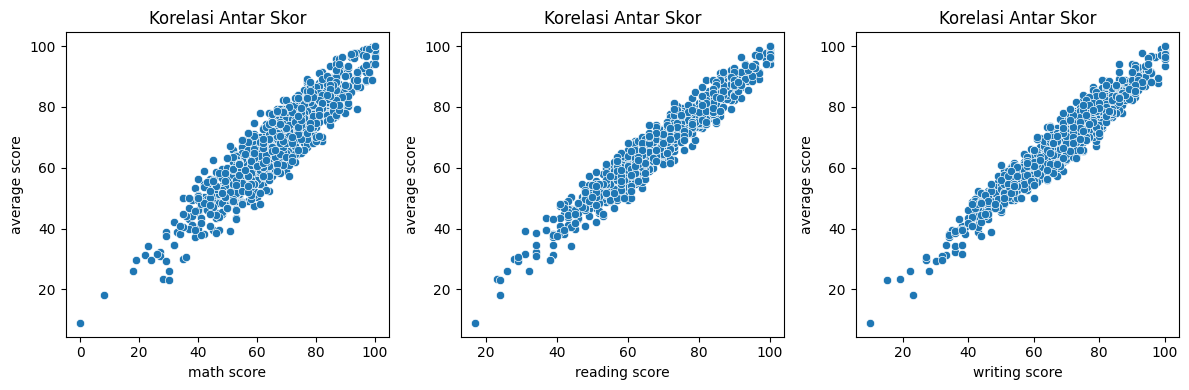

In [ ]:
# KOrelasi antar skor

df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
plt.figure(figsize=(12, 4))

for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1,3,i+1)
    sns.scatterplot(x=col, y='average score', data=df)
    plt.title(f'Korelasi Antar Skor')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

**1. Mengecek nilai kosong**

pada dataset yang saya gunakan tidak terdapat nilai kosong

In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
average score,0


**2. Menghapus data duplikat**

berdasarkan output dataset tidak terdapat nilai duplikat

In [ ]:
# Mengecek data duplikat
print("jumlah data duplikat: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Jumlah data setelah duplikat dihapus", df.shape)  #Hapus data duplikat

jumlah data duplikat:  0
Jumlah data setelah duplikat dihapus (1000, 9)


**3. Deteksi dan penanganan Outlier**

In [ ]:
# Kolom numerik
numerical_cols = ['math score', 'reading score', 'writing score']
z_scores = np.abs((df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std())
df = df[(z_scores < 3).all(axis=1)]
print("Jumlah data setelah penanganan outlier:", df.shape)

Jumlah data setelah penanganan outlier: (993, 9)


4. Normalisasi/Standarisasi data numerik

Melakukan normalisasi/standarisasi untuk kolom-kolom

In [ ]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,0.380705,0.178308,0.381755,72.666667
1,female,group C,some college,standard,completed,0.175990,1.447554,1.333370,82.333333
2,female,group B,master's degree,standard,none,1.608994,1.800122,1.673233,92.666667
3,male,group A,associate's degree,free/reduced,none,-1.325252,-0.879397,-1.657421,49.333333
4,male,group C,some college,standard,none,0.653658,0.601390,0.449728,76.333333


5. Membuat kolom average_score atau kolom rata-rata skor

untuk melihat nilai rata-rata tiap-tiap siswa

In [ ]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

**6. Encoding Data Kategorical**

In [ ]:
# Membuat encoder
le = LabelEncoder()

# kolom kategorikal
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# ubah jadi angka
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()  #Menampilka 5 baris pertama

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,0,1,1,1,1,0.380705,0.178308,0.381755,0.313589
1,0,2,4,1,0,0.175990,1.447554,1.333370,0.985638
2,0,1,3,1,1,1.608994,1.800122,1.673233,1.694116
3,1,0,0,0,1,-1.325252,-0.879397,-1.657421,-1.287356
4,1,2,4,1,1,0.653658,0.601390,0.449728,0.568258


**7. Binning / pengelompokkan data berdasarkan rata-rata skor siswa**

In [ ]:
# Membuat kolom kategoru prestasi
bins=[-np.inf, -0.5, 0.5, np.inf]
labels=['Low', 'Medium', 'Hight']

df['average_score_binned'] = pd.cut(df['average score'], bins=bins, labels=labels)
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,prestasi,average_score_binned
0,0,1,1,1,1,0.380705,0.178308,0.381755,0.313589,Medium,Medium
1,0,2,4,1,0,0.175990,1.447554,1.333370,0.985638,Hight,Hight
2,0,1,3,1,1,1.608994,1.800122,1.673233,1.694116,Hight,Hight
3,1,0,0,0,1,-1.325252,-0.879397,-1.657421,-1.287356,Low,Low
4,1,2,4,1,1,0.653658,0.601390,0.449728,0.568258,Hight,Hight


**8. Split dataset**

In [ ]:
X = df.drop(columns=['average score', 'average_score_binned'])
y = df['average_score_binned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Bentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)

Bentuk X_train: (794, 9)
Bentuk X_test: (199, 9)


**8. Menyimpan hasil preprocessing**

In [ ]:
output_path = '/content/drive/MyDrive/Colab_Notebooks/StudentsPerformanceinExams_preprocessing.csv'
df.to_csv(output_path, index=False)
print(f"Data berhasil disimpan: {output_path}")

Data berhasil disimpan: /content/drive/MyDrive/Colab_Notebooks/StudentsPerformanceinExams_preprocessing.csv
